## $\textbf{Worksheet 08}$

Name: Sabarno Saha
Roll: 22MS037

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':22})
# Omit next 2 lines if scienceplots not installed, just to beatify code.
# Uncomment the last line
import scienceplots
plt.style.use('science')
# plt.style.use('ggplot')

In [2]:
def solve_by_thomas_algorithm(a,b,c,d):
    """
    Description:
    --------------
    Solve a tridiagonal system A x = d using the Thomas algorithm.
    
    Parameters : 
    -------------
        a, b, c are the lower, main, and upper diagonals (each 1D arrays).
        d is the right-hand side array.
        a : float, 1Darray
        b : float, 1Darray
        c : float, 1Darray
        d : float, 1Darray

    Returns:
    -----------
        Returns the solution array x.
    """
    N = len(b)
    bp = np.zeros(N)
    cp = np.zeros(N)
    dp = np.zeros(N)
    xs = np.zeros(N)
    cp[0] = c[0]/b[0]; dp[0] = d[0]/b[0]
    for i in range(1,N):
        bp[i] = b[i] - a[i]*cp[i-1]
        dp[i] = d[i] - a[i]*dp[i-1]
        cp[i] = c[i]/bp[i]
        dp[i] = dp[i]/bp[i]
    xs[-1] = dp[-1]
    for i in range(N-2,0,-1):
        xs[i] = dp[i] - cp[i]*xs[i+1]
    return xs

In [3]:
def solve_heat_equation(params):
    """
    Description:
    -------------
        Solve the 1D heat equation using the Crank–Nicolson method with Thomas algorithm.
    
    Parameters:
    -------------
        params = array,
            (alp, L, Nx, Nt, dt, u_boundary, u_ini, r)
        alp = float,  
            Thermal diffusivity
        L = float, 
            Length of the domain
        Nx = int,  
            Number of spatial grid points
        Nt = int,
            Number of time steps
        dt = int,
            Time step size
        u_boundary = array,
            Tuple (u_left, u_right) for Dirichlet BCs
        u_ini = array,
            Initial temperature profile (1D numpy array of length Nx)
        r = float,
            alp*dt / (dx^2)
    Returns:
    -------------
       ts -> 1D array of time values
       solutions -> 2D array of shape (Nx, Nt+1),
            where solutions[:, k] is the solution at time step k.
    """
    alp, L, Nx, Nt, dt, u_boundary, u_ini, r = params
    u = u_ini
    ts = np.arange(0.0, Nt*dt +dt, dt)
    
    # Variable for storing the solution (Nt+1 as we also store initial value)
    solutions = np.zeros((Nx,Nt+1))
    # Time loop
    for i in range(0,Nt+1):
        # Store
        solutions[:,i] = u
        # For RHS
        d = np.zeros(Nx)
        for j in range(0, Nx):
            d[j] = (1-r)*u[j]
        
            if j>0:
                d[j] += r/2*u[j-1]
            if j<Nx-1:
                d[j] += r/2*u[j+1]
       
        # Adjust Boundary conditions
        d[0] += r*u_boundary[0]
        d[-1] += r*u_boundary[-1]
        # For LHS
        b = (1+r)*np.ones(Nx)
        a = -r/2*np.ones(Nx)
        a[0] = 0
        c = -r/2*np.ones(Nx)
        c[-1] = 0
        u = solve_by_thomas_algorithm(a,b,c,d)
        # Fix boundary values
        u[0], u[-1] = u_boundary
        # Store the last solution
    solutions[:,Nt] = u

    # Return time points and solutions
    return ts, solutions

## $\textbf{Question 1}$
The temperature profile is given by,
$$
u(x,0)=\begin{cases}
			100 K, & \text{if}~ x=0 ~\text{or}~ x=L\\
            300 K, & \text{otherwise}
		 \end{cases}
$$
And the ends are always kept fixed at $100K$, which implies $u(0,t) ~=~ u(L,t) ~=~ 100$.

On taking larger and larger T, we get the temperature distribution to be uniform.

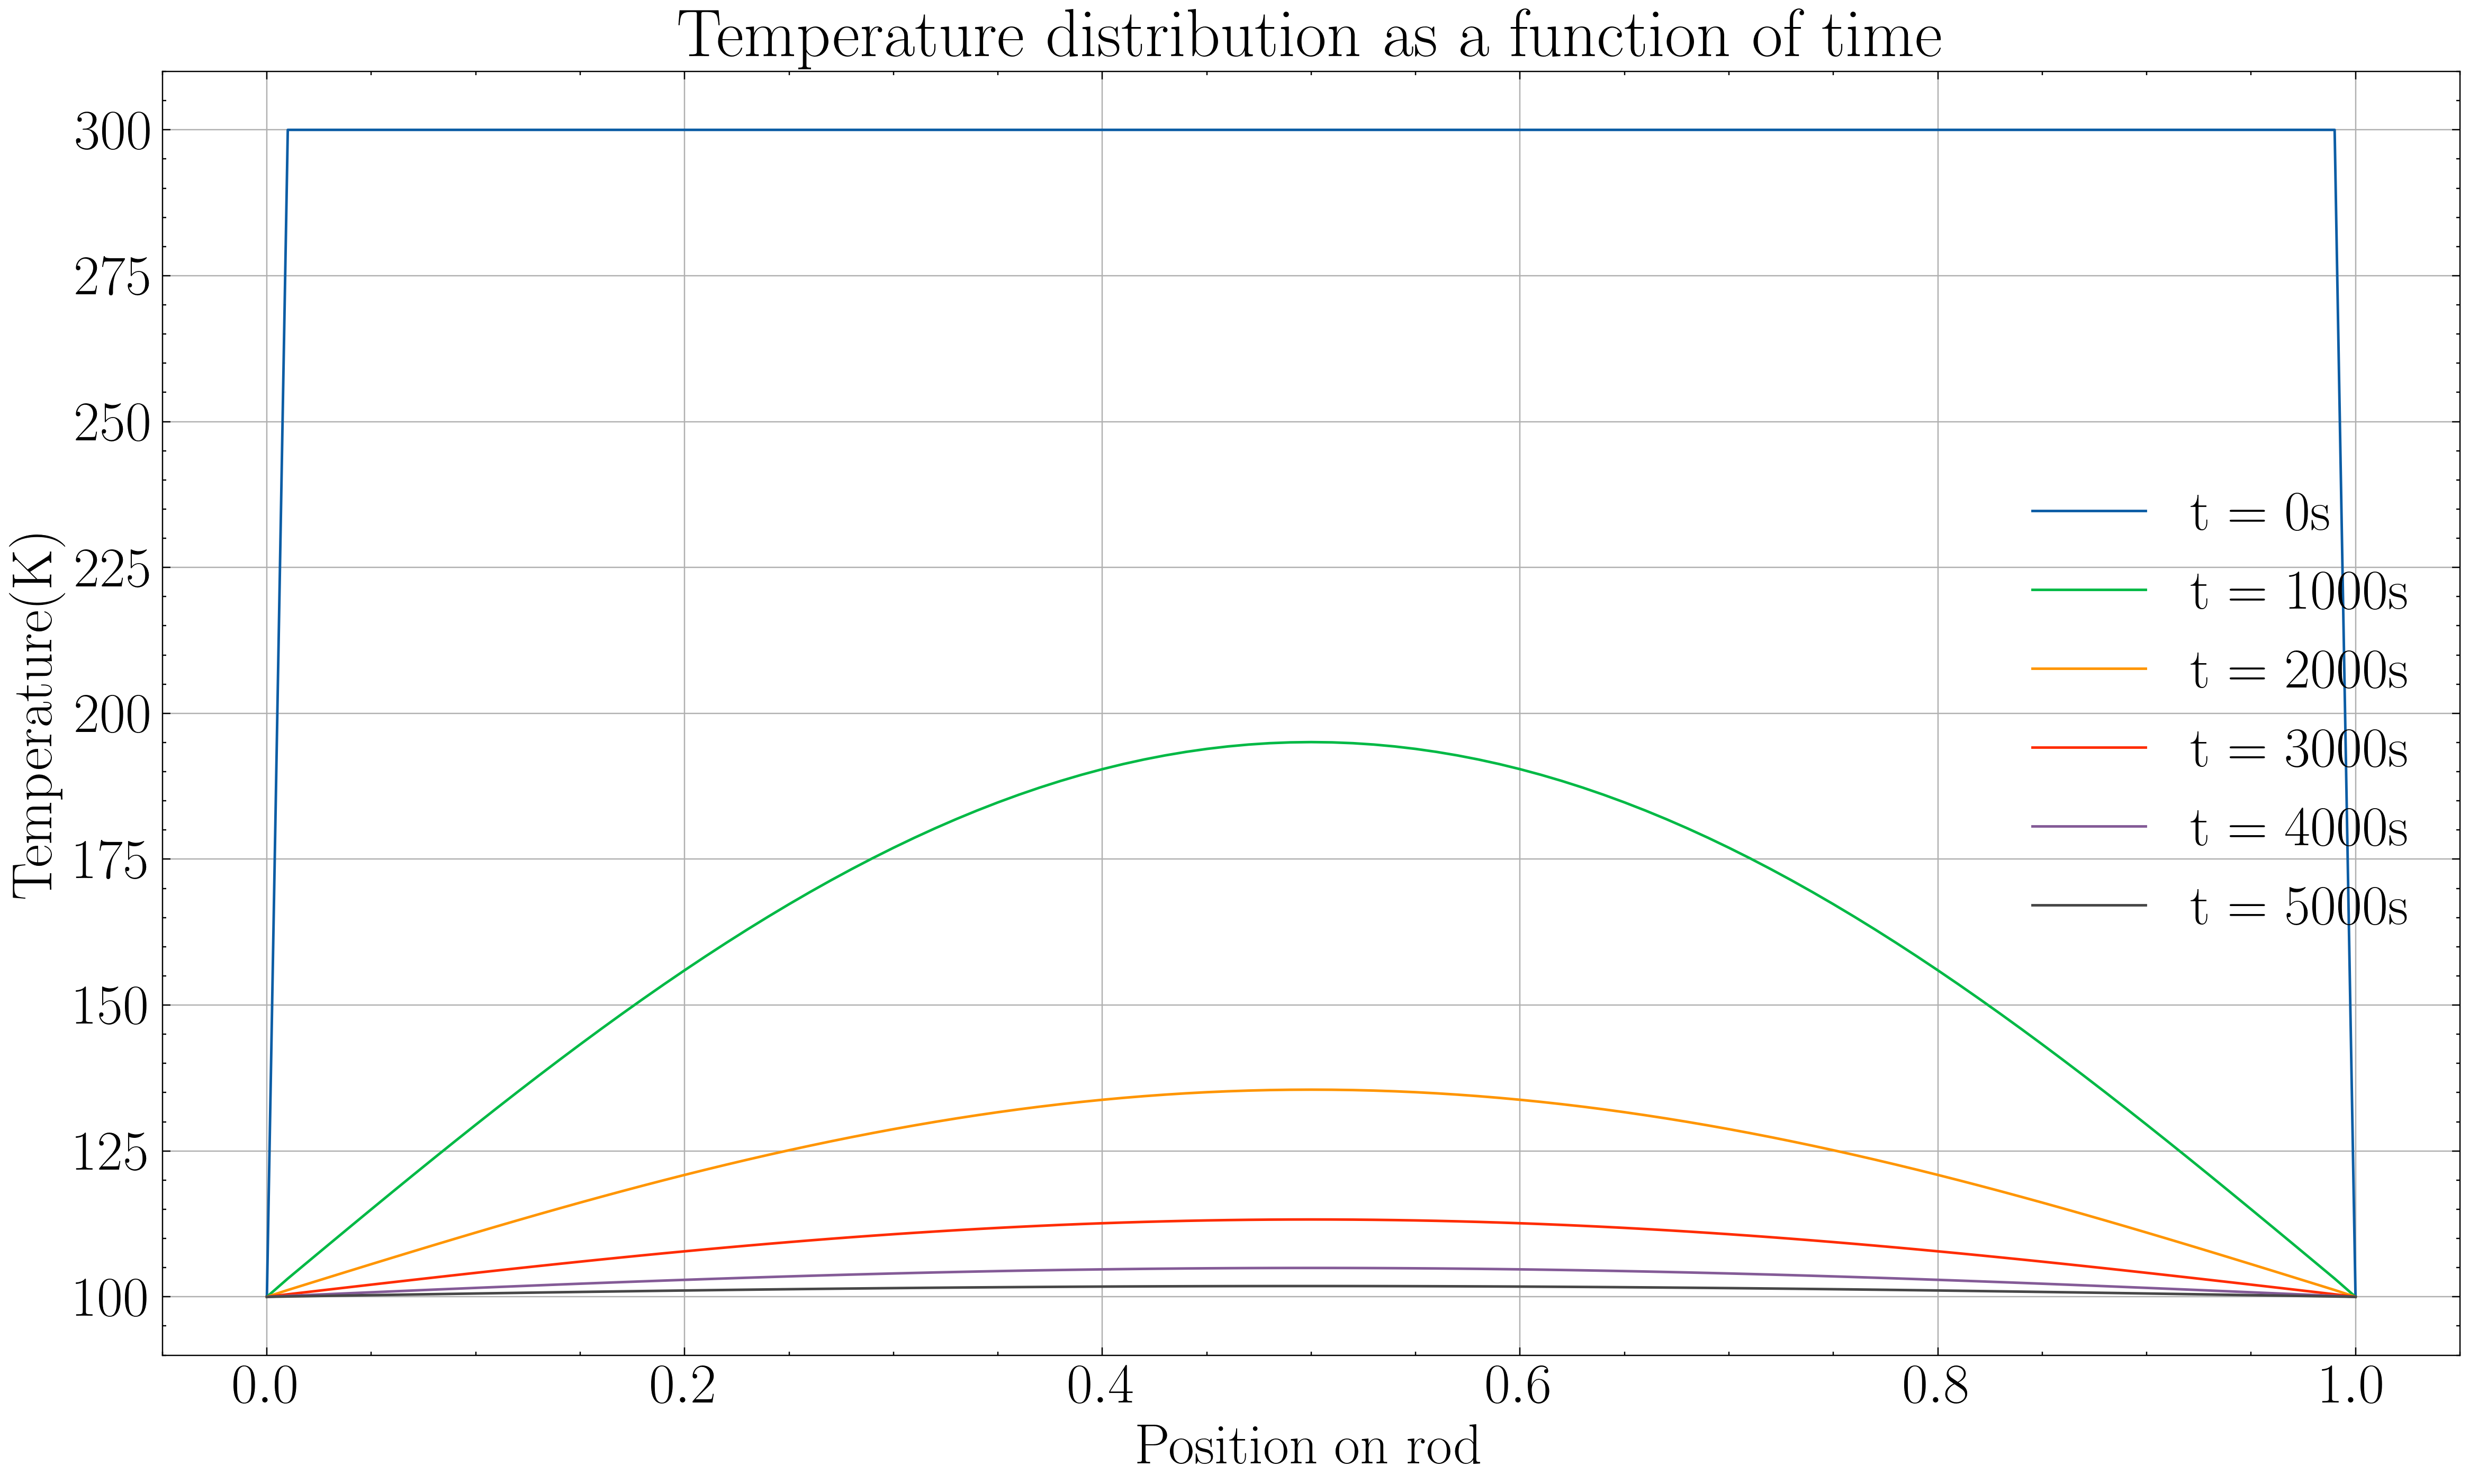

In [11]:
alp = 1.0e-4
L = 1.0
Nx = 101
Nt = 50000
dt = 0.1
sigma = 0.05
u_boundary = [100.0,100.0]
dx = L/(Nx-1)
r = alp*dt/(dx*dx)
xs = np.linspace(0.0, L, Nx)

u_ini = 300*np.ones(len(xs))
u_ini[0] = 100
u_ini[-1] = 100

params = [alp, L, Nx, Nt, dt, u_boundary, u_ini, r]
ts, solutions = solve_heat_equation(params)
plt.figure(figsize=(16,9),dpi=350)
for i in range(0, solutions.shape[1],10000):
    plt.plot(xs,solutions[:,i],label = "t = "+str(int(ts[i])) + "s")
    plt.legend()
plt.title("Temperature distribution as a function of time")
plt.xlabel("Position on rod")
plt.ylabel("Temperature(K)")
plt.grid()

## $\text{Question 2}$
$$
    u_i(x) = 300 + \exp\left(\frac{-(x - L/2)^2}{2\sigma^2}\right)
$$
and the Dirichlet boundary conditions are , $u(0,t) ~=200 $ and $u(L,t) ~=~ 400$.


### $\text{Q2.1 Temperature distribution evolution with time }$

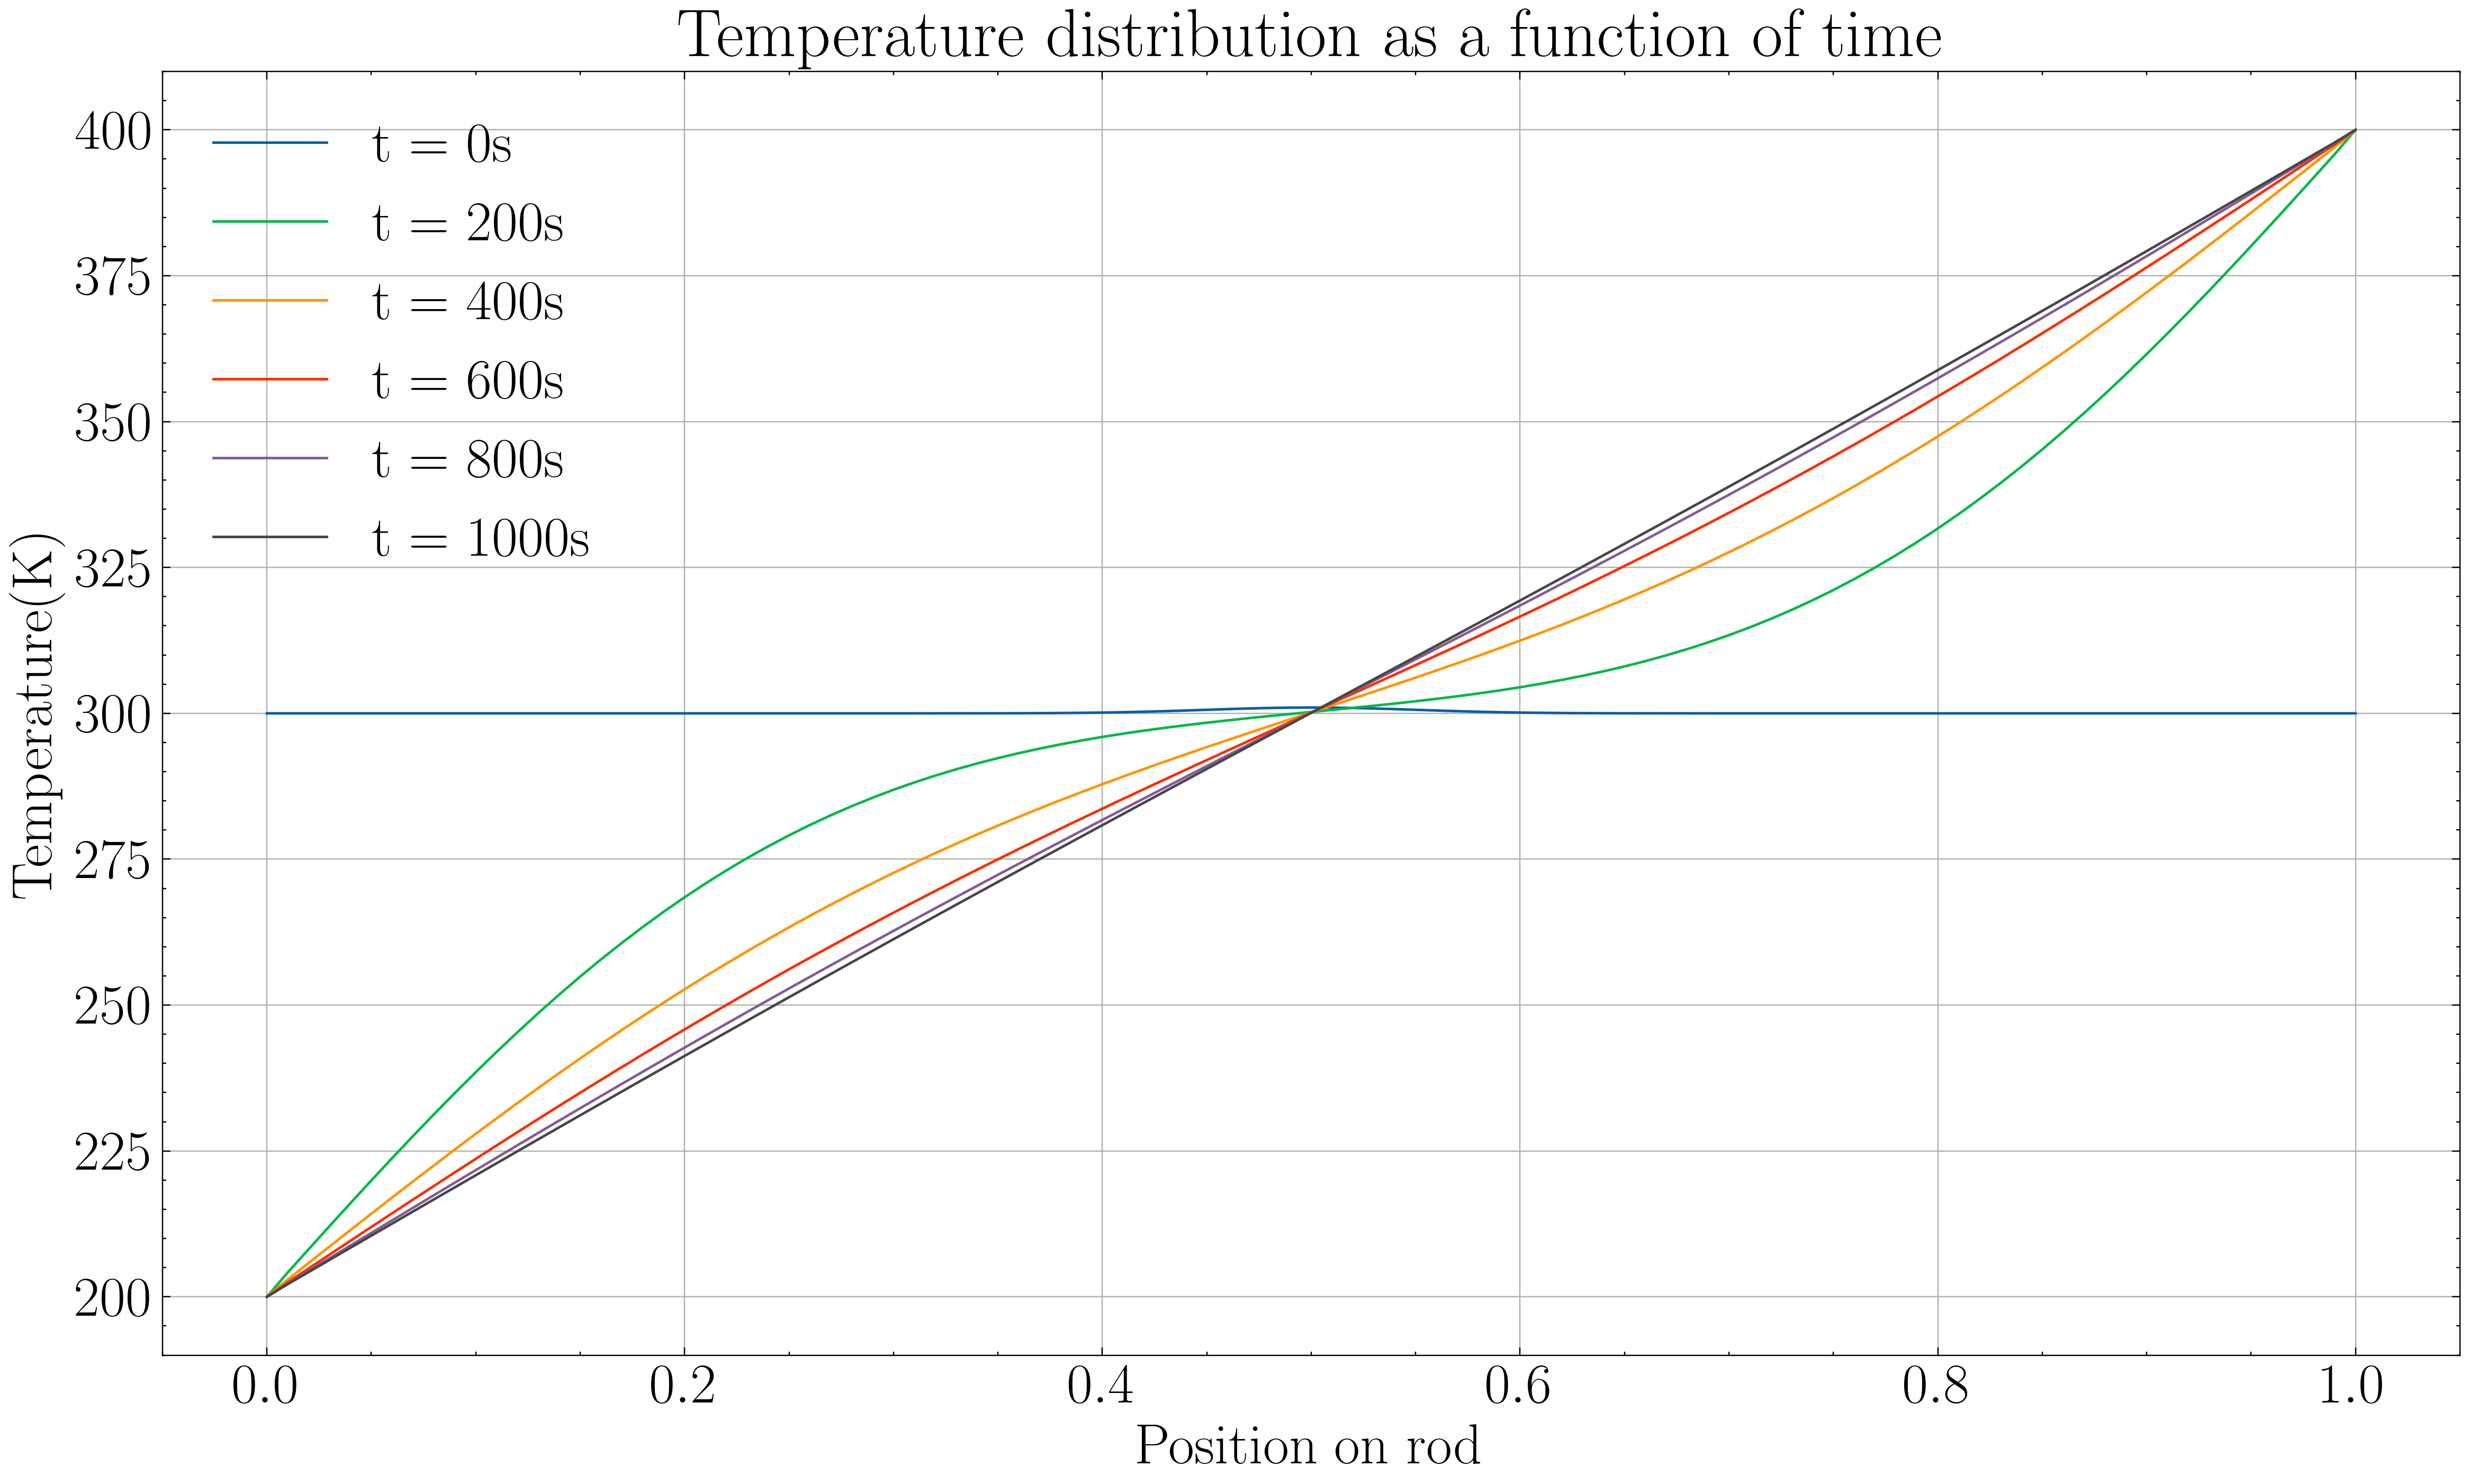

In [5]:
alp = 1.0e-4
L = 1.0
Nx = 101
Nt = 10000
dt = 0.1
sigma = 0.05
u_boundary = [200.0,400.0]
dx = L/(Nx-1)
r = alp*dt/(dx*dx)
xs = np.linspace(0.0, L, Nx)


u_ini = 300 + np.exp(-((xs - L/2)**2)/(2*sigma**2))
plt.figure(figsize=(16,9),dpi=350)
params = [alp, L, Nx, Nt, dt, u_boundary, u_ini, r]
ts, solutions = solve_heat_equation(params)
for i in range(0, solutions.shape[1],2000):
    plt.plot(xs,solutions[:,i],label = "t = "+str(int(ts[i])) + "s")
    plt.legend()
plt.title("Temperature distribution as a function of time")
plt.xlabel("Position on rod")
plt.ylabel("Temperature(K)")
plt.grid()

### $\text{Q2.2 Temperature distribution at same final temperature for different thermal diffusivities. }$
$\alpha = [1.0e-2,1.0e-3, 1.0e-4,1.0e-5, 1.0e-6]$

We observe that on increasing $\alpha$ the temperature distribution reaches the linear profile faster.

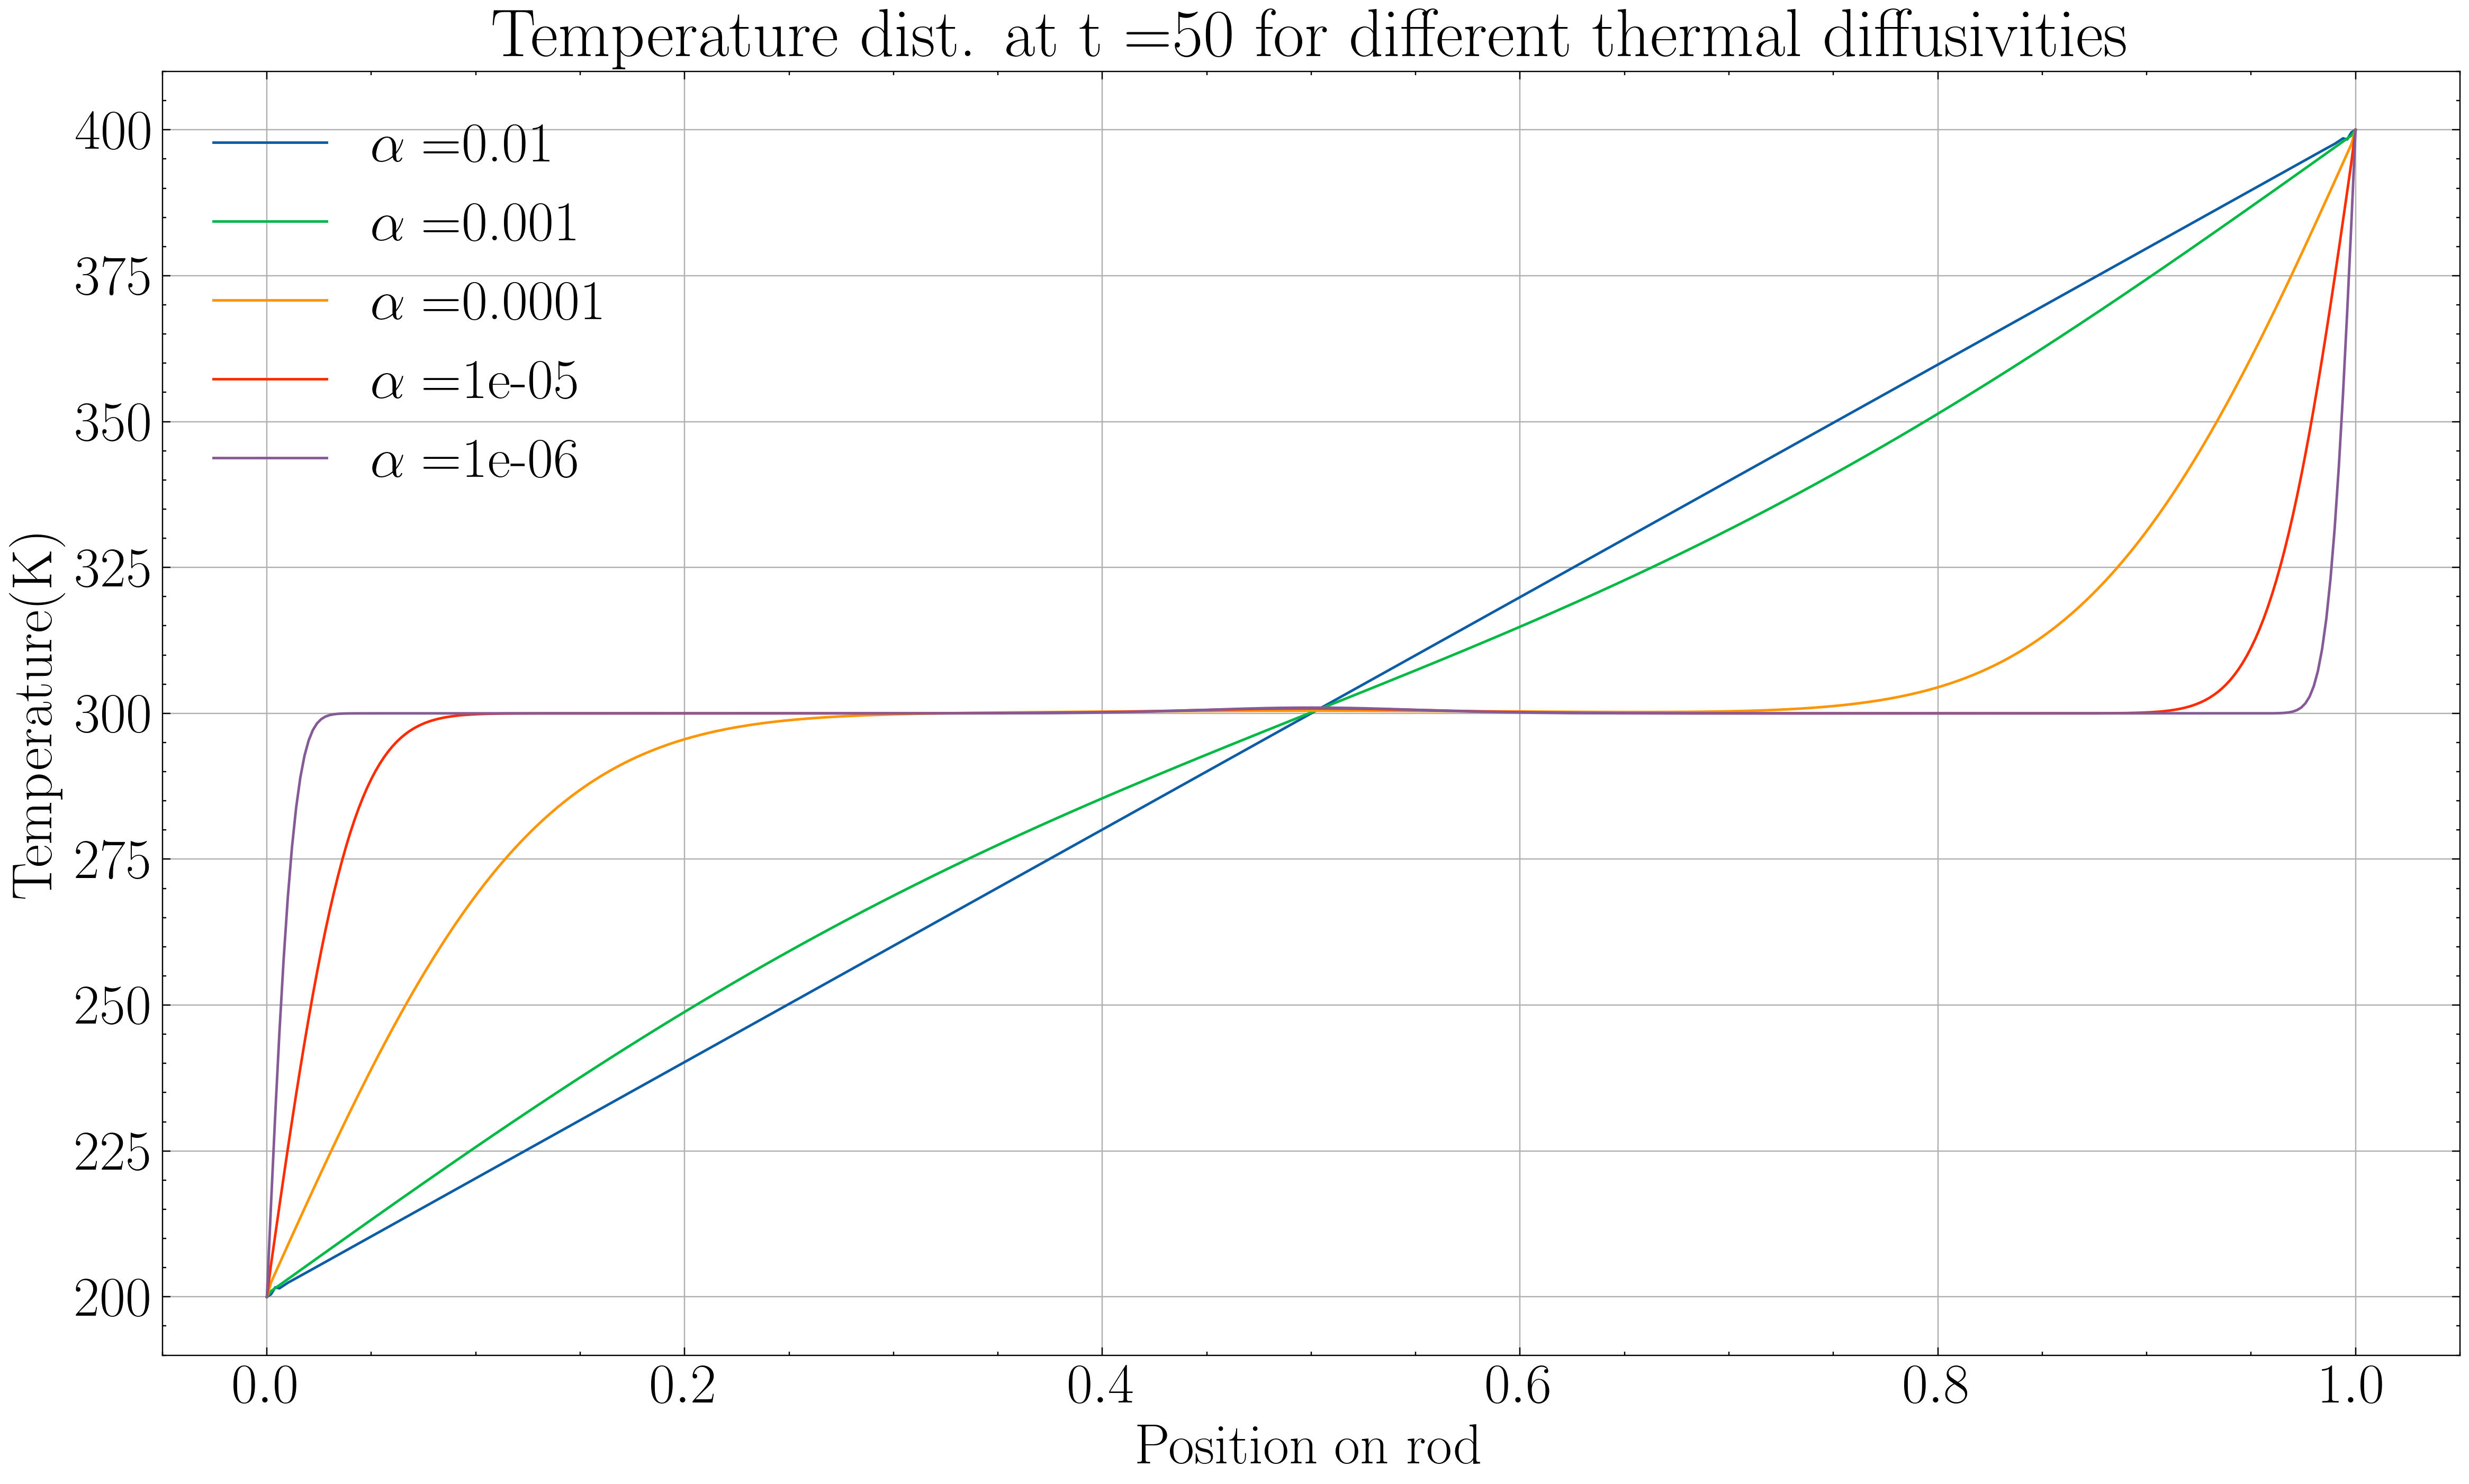

In [6]:
alp = np.asarray([1.0e-2,1.0e-3, 1.0e-4,1.0e-5, 1.0e-6])
L = 1.0
Nx = 501
Nt = 500
dt = 0.1
sigma = 0.05
u_boundary = [200.0,400.0]
dx = L/(Nx-1)
r = alp*dt/(dx*dx)
xs = np.linspace(0.0, L, Nx)
# Initial condition: Gaussian bump over 300 K

u_ini = 300 + np.exp(-((xs - L/2)**2)/(2*sigma**2))
plt.figure(figsize=(16,9),dpi=350)
for j in range(0, len (alp)):
    params = [alp[j], L, Nx, Nt, dt, u_boundary, u_ini, r[j]]
    ts, solutions = solve_heat_equation(params)
    plt.plot(xs,solutions[:,-1],label = r"$\alpha = $" + str(alp[j]))
    plt.legend()
plt.title(f"Temperature dist. at t ={int(Nt*dt):d} for different thermal diffusivities ")
plt.grid()
plt.xlabel("Position on rod")
plt.ylabel("Temperature(K)");

### $\text{Q2.3 Temperature distribution at same final temperature for different values of dt }$
$\Delta t = [1,0.1,0.01,0.001]$

We observe that on decreasing $\Delta t$ there is no noticeable change, other than some smoothing. Note if we just change $\Delta t$ without changing $Nt$, we end up changing the final time itself, which obviously would give us a noticeable change in convergence.

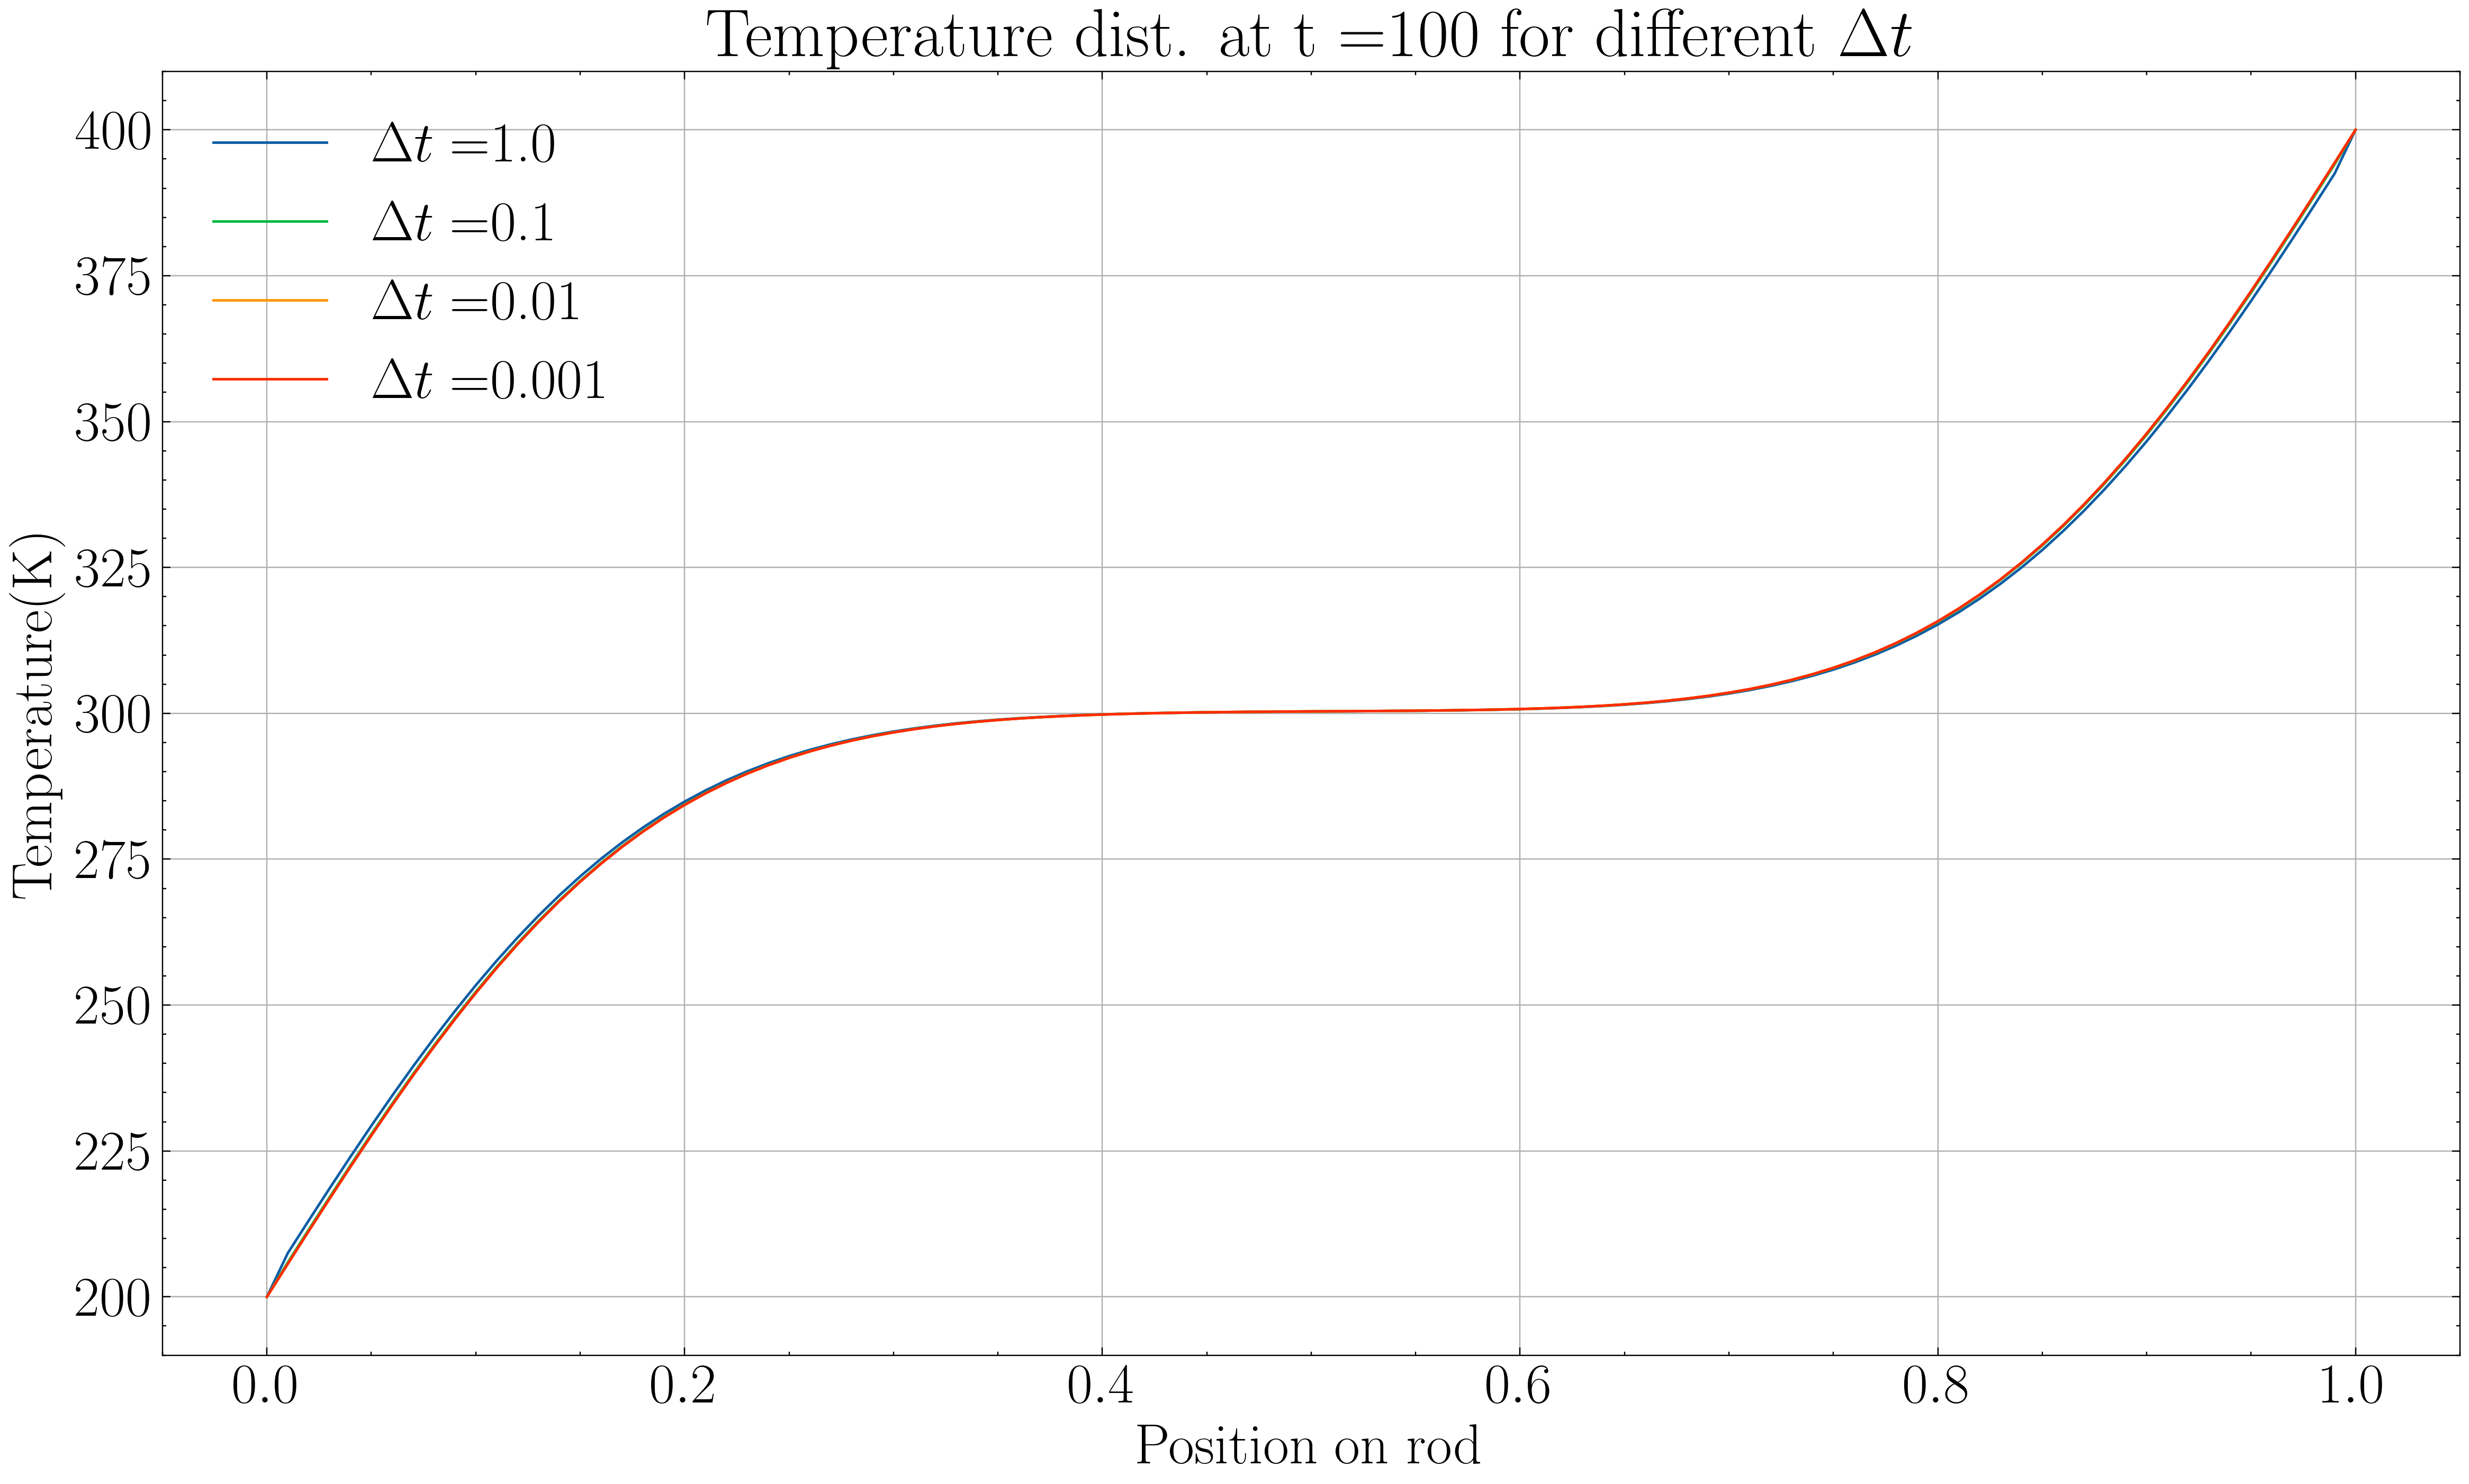

In [7]:
tf = 100
alp = 1.0e-4
L = 1.0
Nx = 101

dt = np.asarray([1,0.1,0.01,0.001])
Nt = np.asarray(tf/dt, dtype=int)

sigma = 0.05
u_boundary = [200.0,400.0]
dx = L/(Nx-1)
r = alp*dt/(dx*dx)
xs = np.linspace(0.0, L, Nx)
# Initial condition: Gaussian bump over 300 K

u_ini = 300 + np.exp(-((xs - L/2)**2)/(2*sigma**2))
plt.figure(figsize=(16,9),dpi=350)
for j in range(0, len (dt)):
    params = [alp, L, Nx, Nt[j], dt[j], u_boundary, u_ini, r[j]]
    ts, solutions = solve_heat_equation(params)
    plt.plot(xs,solutions[:,-1],label = r"$\Delta t= $" + str(dt[j]))
    plt.legend()
plt.title(f"Temperature dist. at t ={tf:d} for different "+r"$\Delta t$")
plt.xlabel("Position on rod")
plt.ylabel("Temperature(K)")
plt.grid()


### $\text{Q2.4 Temperature distribution at same final temperature for different values of dx }$
$N_x = [11,101,1001,10001]$

We observe that on increasing $N_x$ there is no noticeable change, other than some smoothing.

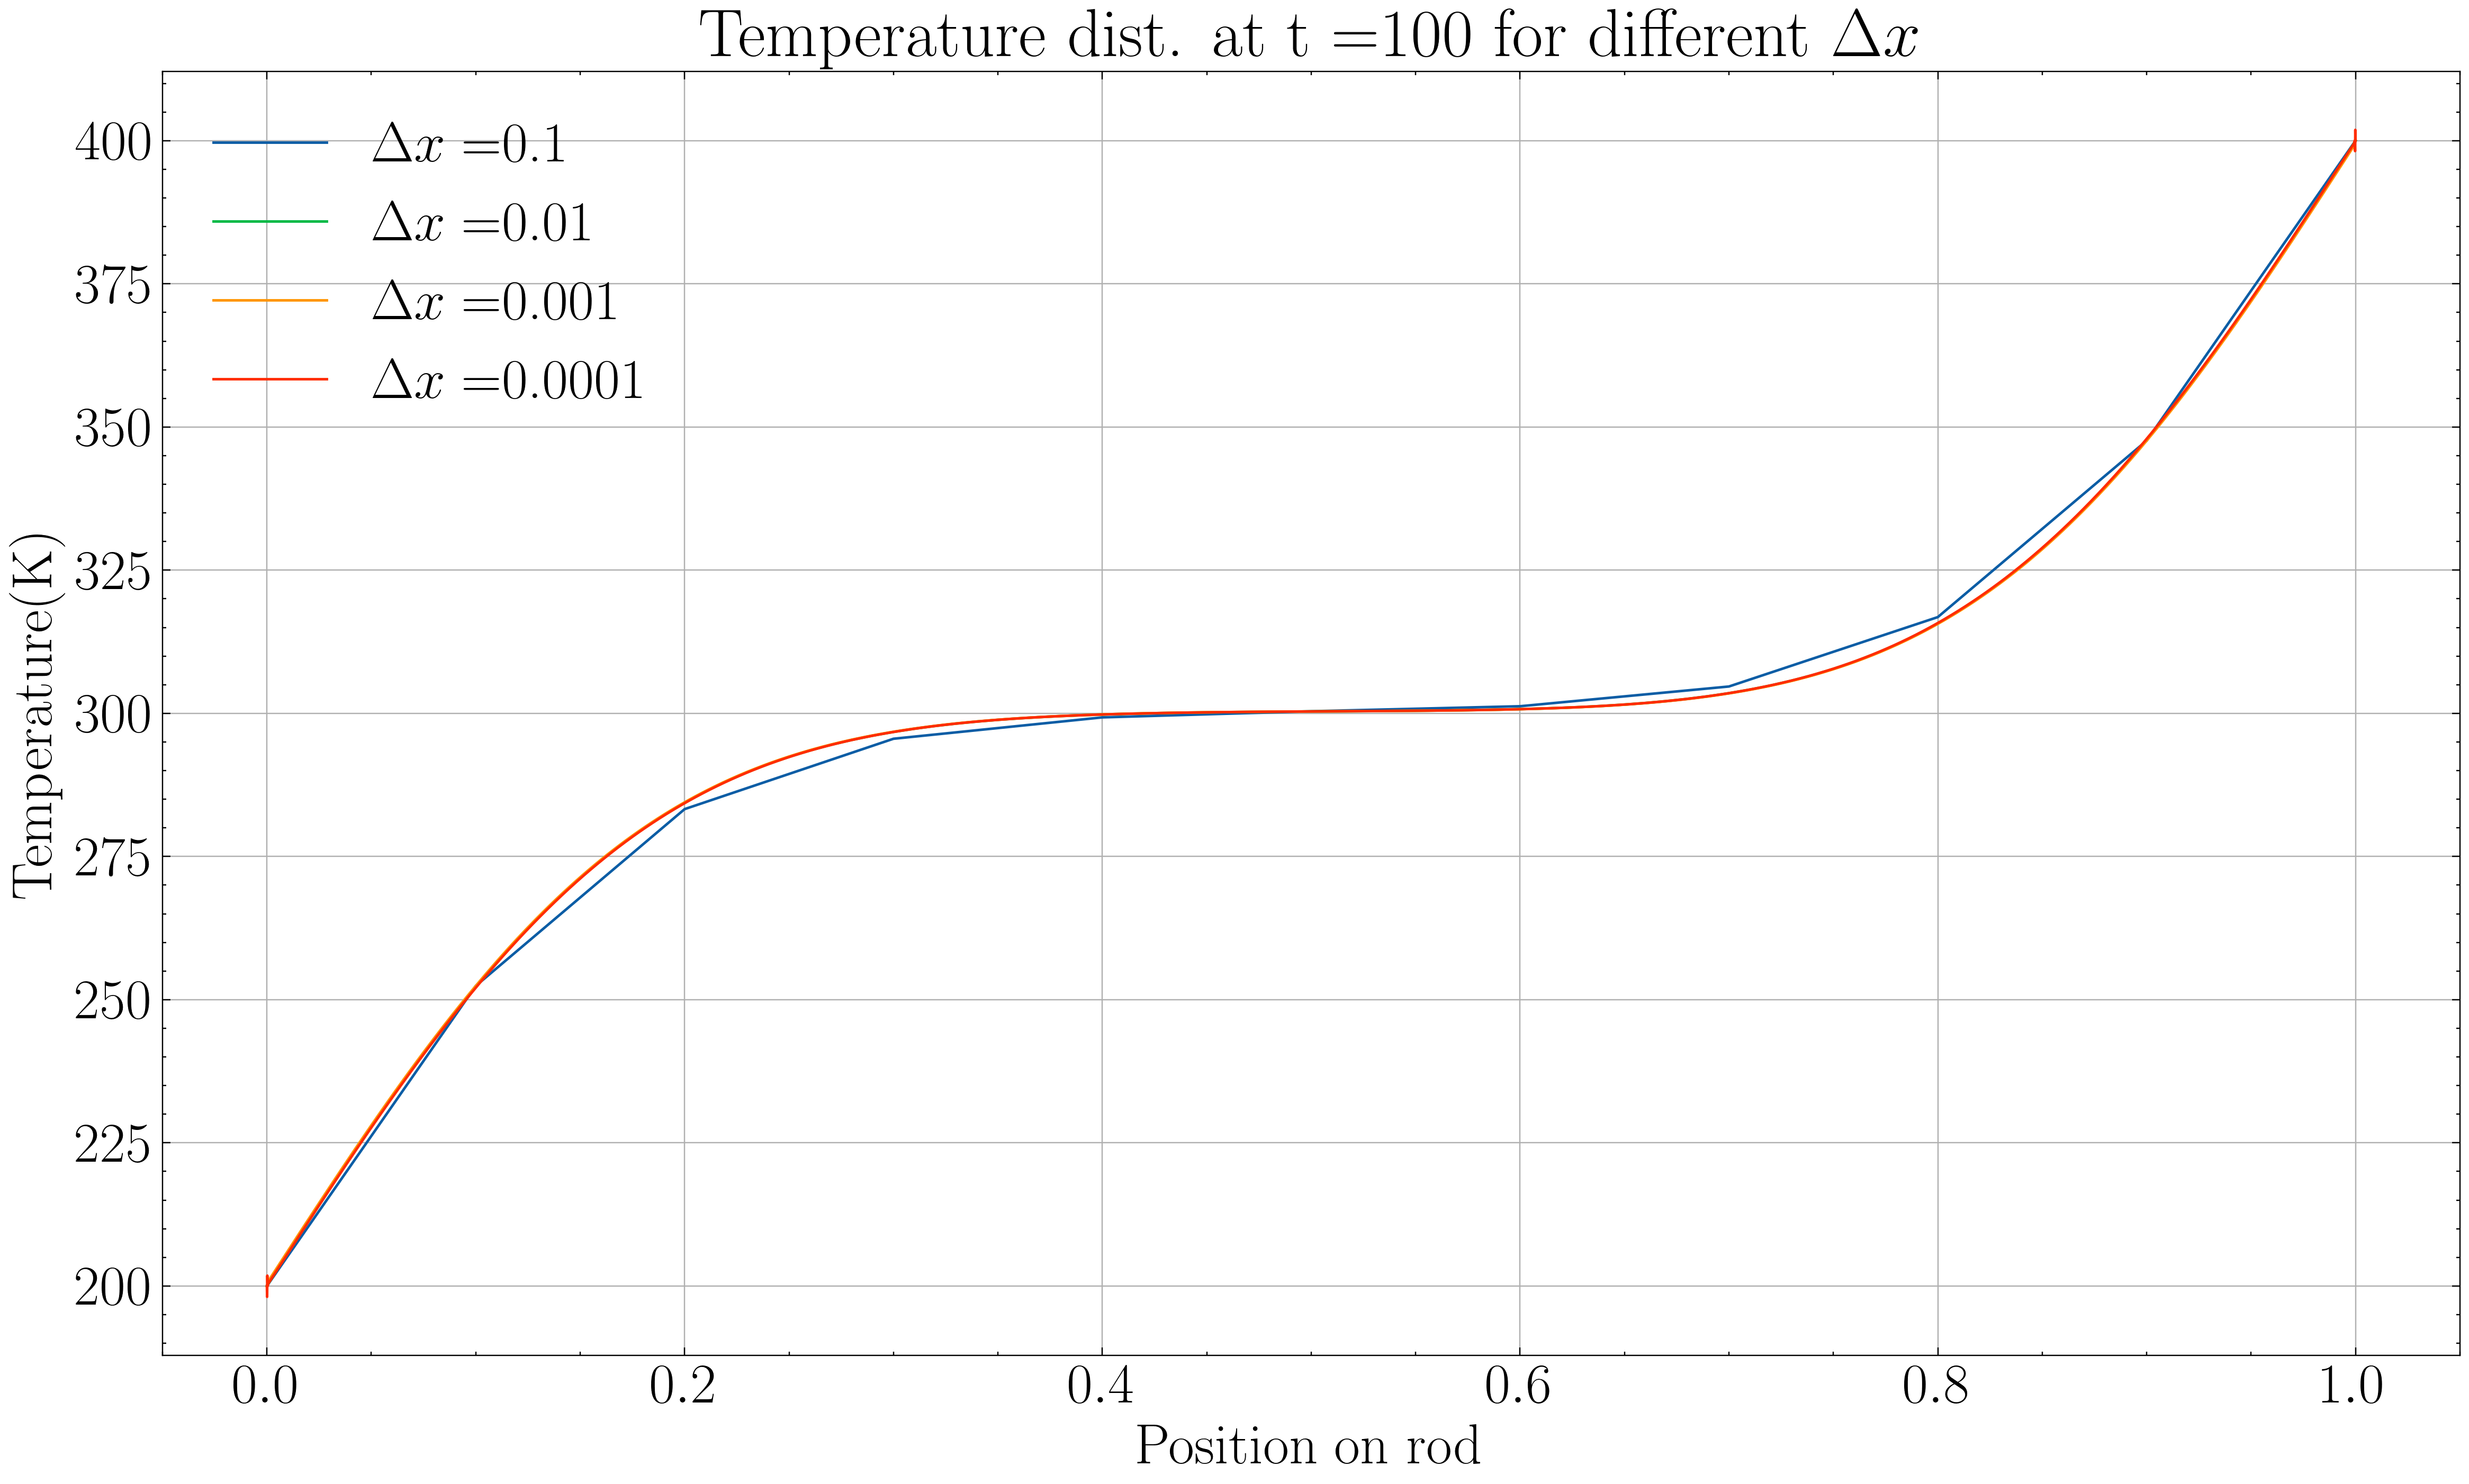

In [8]:
alp = 1.0e-4
L = 1.0
Nx = np.asarray([11,101,1001,10001])

dt = 0.1
Nt = 1000

sigma = 0.05
u_boundary = [200.0,400.0]
dx = L/(Nx-1)
r = alp*dt/(dx*dx)

plt.figure(figsize=(16,9),dpi=350)
for j in range(0, len (dx)):
    xs = np.linspace(0.0, L, Nx[j])
    # Initial condition: Gaussian bump over 300 K
    
    u_ini = 300 + np.exp(-((xs - L/2)**2)/(2*sigma**2))
    params = [alp, L, Nx[j], Nt, dt, u_boundary, u_ini, r[j]]
    ts, solutions = solve_heat_equation(params)
    plt.plot(xs,solutions[:,-1],label = r"$\Delta x= $" + str(dx[j]))
    plt.legend()
plt.title(f"Temperature dist. at t ={tf:d} for different "+r"$\Delta x$")
plt.xlabel("Position on rod")
plt.ylabel("Temperature(K)")
plt.grid()